# Análise exploratória do Dataset sobre o Consumo de cerveja na cidade de São Paulo

Link: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

Este dataset possui dados coletados na cidade de São Paulo em uma área universitária, onde acontecem festas de grupos de estudadntes entre 18 e 25 anos.
Os dados foram coletados no período de 1 ano, em 2015.


Importa-se as bibliotecas para manipulação dos dados:

In [1]:
import pandas as pd #tratamento dos datasets
import numpy as np #manipulações de álgerba linear
import matplotlib.pyplot as plt #plotagem de gráficos
import seaborn as sns #plotagem de gráficos

Depois abre-se o dataset com a biblioteca Pandas:

In [2]:
dataset = pd.read_csv("Consumo_cerveja.csv")
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


Com o dataset aberto varificam-se os tipos dos dados:

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB
None


Observando as informações obtidas, conclui-se que é necessário alterar o tipo de dado de algumas colunas. E também descartar os valores duplicados e "NaN":

In [4]:
for coluna in ['Temperatura Media (C)', 'Temperatura Minima (C)','Temperatura Maxima (C)' ,'Precipitacao (mm)']:
    dataset[coluna] = dataset[coluna].str.replace(',', '.').astype(float)

dataset['Final de Semana'] = dataset['Final de Semana'].astype(bool)

dataset = dataset.drop_duplicates()
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    bool   
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: bool(1), float64(5), object(1)
memory usage: 20.3+ KB


Após isso, pode-se extrair alguns dados estísticos do dataset:

In [5]:
print(dataset.describe())
print("Formato: {}".format(dataset.shape))

       Temperatura Media (C)  Temperatura Minima (C)  Temperatura Maxima (C)  \
count             365.000000              365.000000              365.000000   
mean               21.226356               17.461370               26.611507   
std                 3.180108                2.826185                4.317366   
min                12.900000               10.600000               14.500000   
25%                19.020000               15.300000               23.800000   
50%                21.380000               17.900000               26.900000   
75%                23.280000               19.600000               29.400000   
max                28.860000               24.500000               36.500000   

       Precipitacao (mm)  Consumo de cerveja (litros)  
count         365.000000                   365.000000  
mean            5.196712                    25.401367  
std            12.417844                     4.399143  
min             0.000000                    14.343000  

Separando os dados em dia, mês e ano e adicionando as faixas de temperatura para análise de mínima, média e máxima:

In [6]:
dataset['Data'] =  pd.to_datetime(dataset['Data'])

dataset['Ano'] = dataset['Data'].dt.year
dataset['Mes'] = dataset['Data'].dt.month
dataset['Dia'] = dataset['Data'].dt.day

def faixa_temp(a, b, c, temp):
    if temp <= a:
        return 0
    elif a < temp <= b:
        return 1
    elif b < temp <= c:
        return 2
    else:
        return 3

def faixa_temp2(a, temp):
    return 0 if temp <= a else 1

dataset['Faixa de Maxima'] = dataset['Temperatura Maxima (C)'].map(lambda x: faixa_temp(23, 26, 29, x))
dataset['Faixa de Maxima 2'] = dataset['Temperatura Maxima (C)'].map(lambda x: faixa_temp2(26, x))
dataset['Faixa de Media'] = dataset['Temperatura Media (C)'].map(lambda x: faixa_temp(19, 21, 23, x))
dataset['Faixa de Media 2'] = dataset['Temperatura Media (C)'].map(lambda x: faixa_temp2(21, x))
dataset['Faixa de Minima'] = dataset['Temperatura Minima (C)'].map(lambda x: faixa_temp(15, 18, 20, x))
dataset['Faixa de Minima 2'] = dataset['Temperatura Minima (C)'].map(lambda x: faixa_temp2(18, x))


dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Ano,Mes,Dia,Faixa de Maxima,Faixa de Maxima 2,Faixa de Media,Faixa de Media 2,Faixa de Minima,Faixa de Minima 2
0,2015-01-01,27.30,23.9,32.5,0.0,False,25.461,2015,1,1,3,1,3,1,3,1
1,2015-01-02,27.02,24.5,33.5,0.0,False,28.972,2015,1,2,3,1,3,1,3,1
2,2015-01-03,24.82,22.4,29.9,0.0,True,30.814,2015,1,3,3,1,3,1,3,1
3,2015-01-04,23.98,21.5,28.6,1.2,True,29.799,2015,1,4,2,1,3,1,3,1
4,2015-01-05,23.82,21.0,28.3,0.0,False,28.900,2015,1,5,2,1,3,1,3,1


Vizualiando o consumo durante o ano:

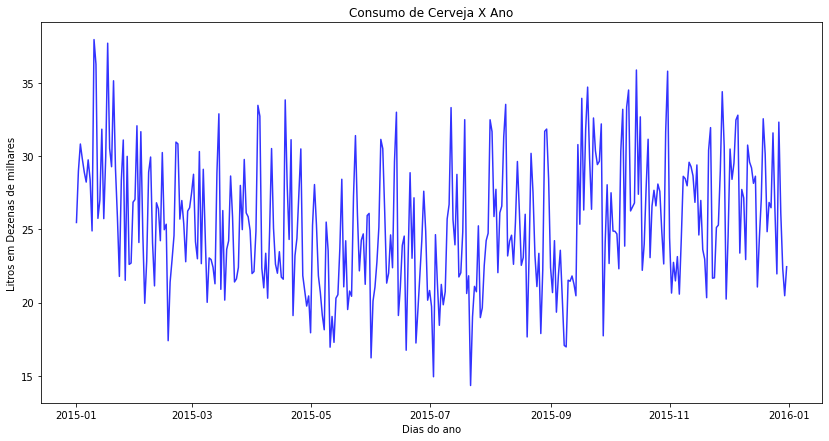

In [7]:
plt.figure(figsize=(14,7))
plt.plot(dataset['Data'], dataset['Consumo de cerveja (litros)'], c='blue', alpha=0.8)
plt.title("Consumo de Cerveja X Ano")
plt.xlabel('Dias do ano')
plt.ylabel('Litros em Dezenas de milhares')
plt.show()

Distribuição do consumo por Mês:

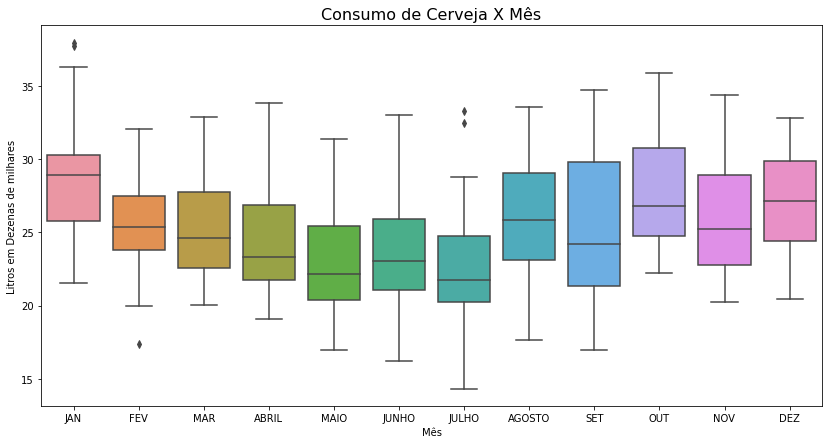

In [13]:
plt.figure(figsize=(14,7))

sns.boxplot(x='Mes', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Mês", fontsize=16)
plt.xticks(np.arange(0,12,1), ('JAN', 'FEV', 'MAR', 'ABRIL', 'MAIO', 'JUNHO', 'JULHO','AGOSTO','SET', 'OUT', 'NOV','DEZ'))
plt.xlabel("Mês")
plt.ylabel('Litros em Dezenas de milhares')
plt.show()

Vizualizando a relação com ser final de semana ou não:

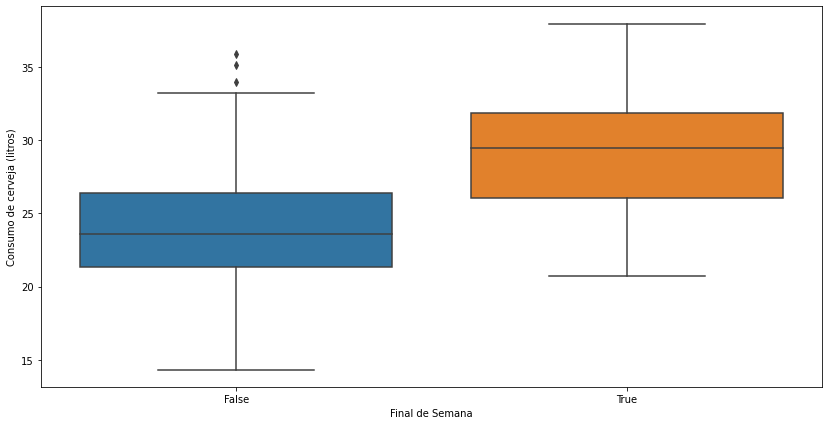

In [9]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Final de Semana', y='Consumo de cerveja (litros)', data=dataset)
plt.show()

Verificando  relação do consumo de cerveja com as temperaturas mínima, média e máxima registradas na cidade de São Paulo:

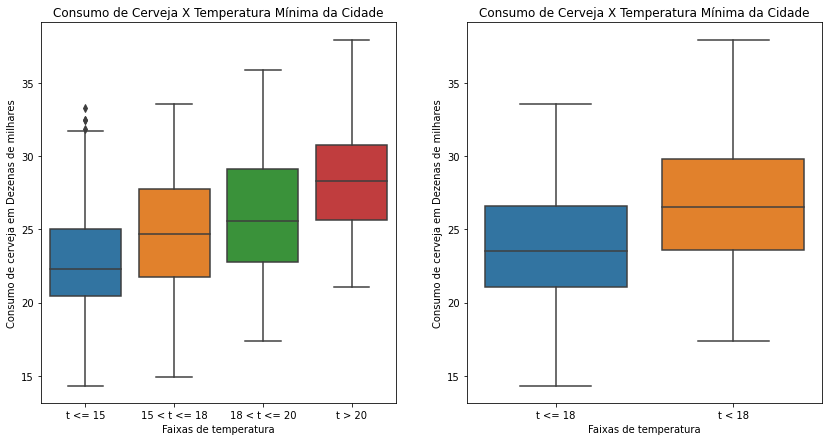

In [14]:
plt.figure(figsize=(14, 7))


plt.subplot(1,2,1)
sns.boxplot(x='Faixa de Minima', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Mínima da Cidade")
plt.xticks([0, 1, 2, 3], ['t <= 15', '15 < t <= 18', '18 < t <= 20', 't > 20'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')

plt.subplot(1,2,2)
sns.boxplot(x='Faixa de Minima 2', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Mínima da Cidade")
plt.xticks([0, 1], ['t <= 18', 't < 18'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')

plt.show()

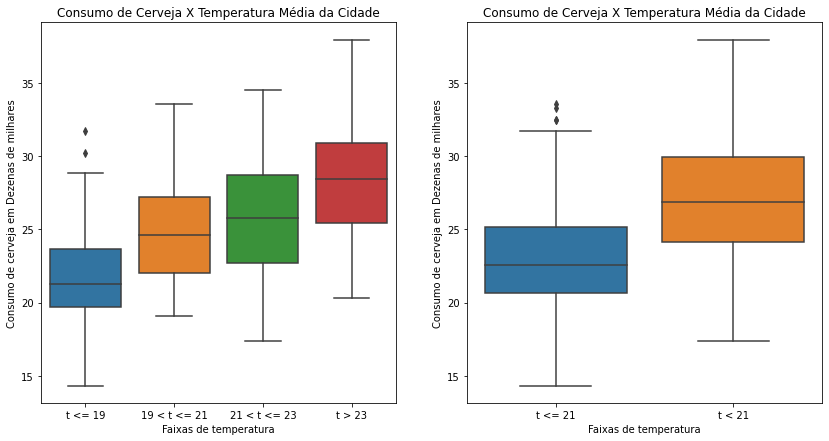

In [15]:
plt.figure(figsize=(14, 7))


plt.subplot(1,2,1)
sns.boxplot(x='Faixa de Media', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Média da Cidade")
plt.xticks([0, 1, 2, 3], ['t <= 19', '19 < t <= 21', '21 < t <= 23', 't > 23'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')

plt.subplot(1,2,2)
sns.boxplot(x='Faixa de Media 2', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Média da Cidade")
plt.xticks([0, 1], ['t <= 21', 't < 21'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')

plt.show()

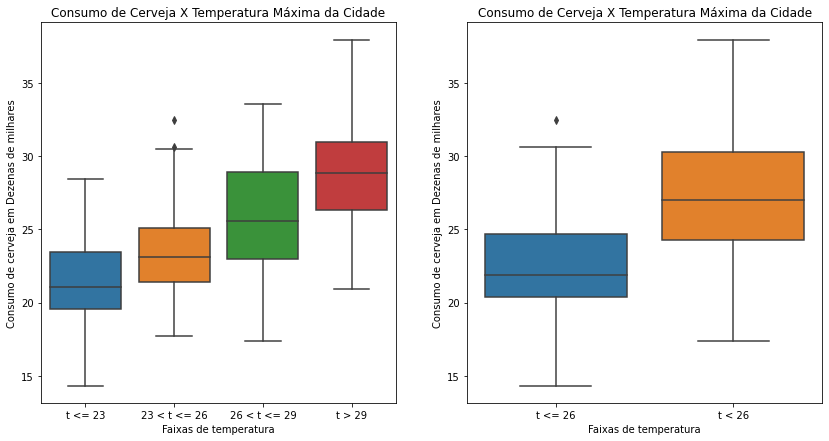

In [16]:
plt.figure(figsize=(14, 7))


plt.subplot(1,2,1)
sns.boxplot(x='Faixa de Maxima', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Máxima da Cidade")
plt.xticks([0, 1, 2, 3], ['t <= 23', '23 < t <= 26', '26 < t <= 29', 't > 29'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')


plt.subplot(1,2,2)
sns.boxplot(x='Faixa de Maxima 2', y='Consumo de cerveja (litros)', data=dataset)
plt.title("Consumo de Cerveja X Temperatura Máxima da Cidade")
plt.xticks([0, 1], ['t <= 26', 't < 26'])
plt.xlabel('Faixas de temperatura')
plt.ylabel('Consumo de cerveja em Dezenas de milhares')


plt.show()

Verificando a relação do consumo de cerveja e a Precipitação na cidade de São Paulo:

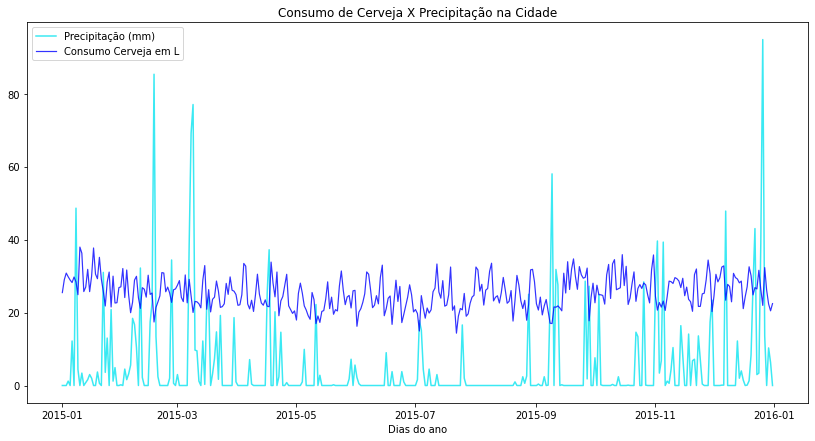

In [11]:
plt.figure(figsize=(14,7))
plt.plot(dataset['Data'], dataset['Precipitacao (mm)'], c='#0ae4f0', alpha=0.8, label="Precipitação (mm)")
plt.plot(dataset['Data'], dataset['Consumo de cerveja (litros)'], c='b', alpha=0.8, label="Consumo Cerveja em L", linewidth=1.2)
plt.legend()
plt.title("Consumo de Cerveja X Precipitação na Cidade")
plt.xlabel('Dias do ano')
plt.show()

Com os gráficos feitos, podemos verificar que apesar do consumo se marter em uma média durante todo o ano, existe uma forte relação com as temperaturas registradas na cidade de São Paulo e o consumo de cerveja registrado. Quando a temperatura da Cidade é maior o consumo de ceveja aumenta e o mesmo acontece no sentido contrário, ou seja, quando a temperatura é menor o consumo também é menor.

Além disso, observa-se que existe um consumo muito maior durante os finais de semana. Enquanto no final de semana (Sábado e Domingo) o total consumido foi de aproximadamente 3 milhões de litros, durante a semana o consumo foi de aproximadamente 6 milhões de litros.

Por fim, considerando a Precipitação em milímetros na cidade de São Paulo e o consumo de cerveja, observa-se que quando a precipitação é muito akte existe uma queda no consumo. Além disso, após um perído de chuvas existe um aumento significativo no consumo, sendo alguns dos registros de maior consumo, após períodos de chuva.